In [30]:
# import libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define inputs
age = ctrl.Antecedent(np.arange(4, 34, 1), 'age')
portion = ctrl.Antecedent(np.arange(0, 100, 1), 'portion')
attention = ctrl.Antecedent(np.arange(6, 13, 1), 'attention')

# Define output
probability = ctrl.Consequent(np.arange(0, 100, 1), 'probability', defuzzify_method="centroid")
# probability = ctrl.Consequent(np.arange(0, 100, 1), 'probability', defuzzify_method="mom")
# probability = ctrl.Consequent(np.arange(0, 100, 1), 'probability', defuzzify_method="bisector")

# Define membership functions
age['child-teen'] = fuzz.trimf(age.universe, [4, 4, 20])
age['young-adult'] = fuzz.trimf(age.universe, [18, 23, 28])
age['adult'] = fuzz.trimf(age.universe, [24, 34, 34])

portion['small'] = fuzz.trimf(portion.universe, [0, 0, 40])
portion['medium'] = fuzz.trimf(portion.universe, [30, 50, 70])
portion['large'] = fuzz.trimf(portion.universe, [60, 100, 100])

attention['short'] = fuzz.trimf(attention.universe, [5, 5, 9])
attention['medium'] = fuzz.trimf(attention.universe, [7, 9, 11])
attention['long'] = fuzz.trimf(attention.universe, [9, 13, 13])

probability['low'] = fuzz.trimf(probability.universe, [0, 0, 40])
probability['medium'] = fuzz.trimf(probability.universe, [30, 50, 70])
probability['high'] = fuzz.trimf(probability.universe, [60, 100, 100])

# Define the rules
rule1 = ctrl.Rule(portion['small'], probability['low'])
rule2 = ctrl.Rule(portion['large'] & attention['short'] & ~age['adult'], probability['high'])
rule3 = ctrl.Rule(portion['medium'] & ~attention['short'] & age['child-teen'], probability['medium'])
rule4 = ctrl.Rule(portion['medium'] & age['young-adult'], probability['medium'])
rule5 = ctrl.Rule(portion['large'] & attention['long'] & age['child-teen'], probability['medium'])
rule6 = ctrl.Rule(portion['medium'] & attention['short'] & age['child-teen'], probability['high'])
rule7 = ctrl.Rule(portion['large'] & attention['medium'] & age['child-teen'], probability['high'])
rule8 = ctrl.Rule(portion['large'] & attention['medium'] & age['young-adult'], probability['medium'])
rule9 = ctrl.Rule(~portion['small'] & age['adult'], probability['medium'])

# Define the control system
model_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

47.751660026560366


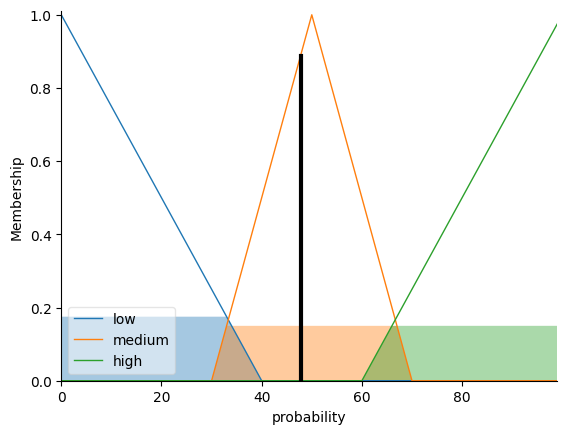

In [31]:
model1 = ctrl.ControlSystemSimulation(model_ctrl)
# Pass in inputs
model1.input['age'] = 17
model1.input['portion'] = 33
model1.input['attention'] = 7
# Compute output
model1.compute()
probability.view(sim=model1)
# Print output
print(model1.output['probability'])

20.071743929359826


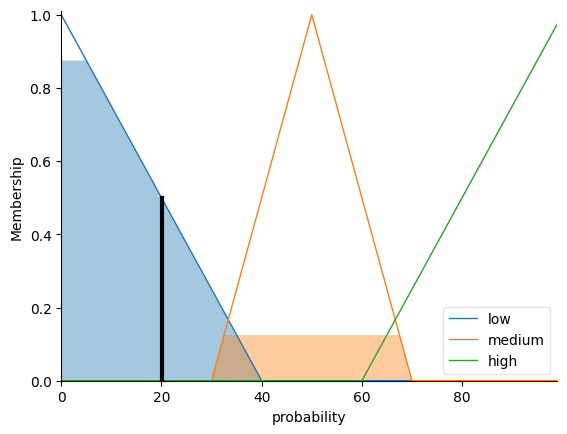

In [32]:
model2 = ctrl.ControlSystemSimulation(model_ctrl)
# Pass in inputs
model2.input['age'] = 32
model2.input['portion'] = 5
model2.input['attention'] = 10
# Compute output
model2.compute()
probability.view(sim=model2)
# Print output
print(model2.output['probability'])

83.92528735632185


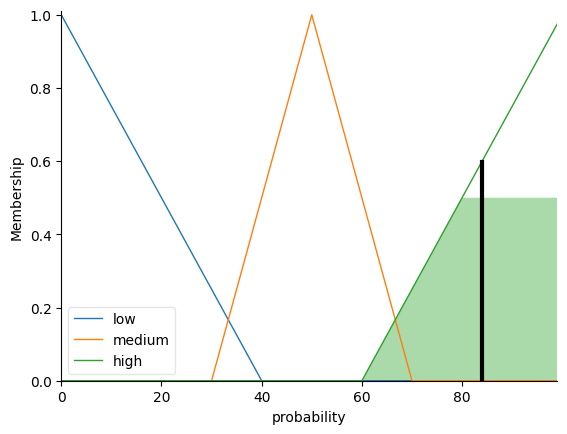

In [33]:
model3 = ctrl.ControlSystemSimulation(model_ctrl)
# Pass in inputs
model3.input['age'] = 7
model3.input['portion'] = 80
model3.input['attention'] = 6
# Compute output
model3.compute()
probability.view(sim=model3)
# Print output
print(model3.output['probability'])

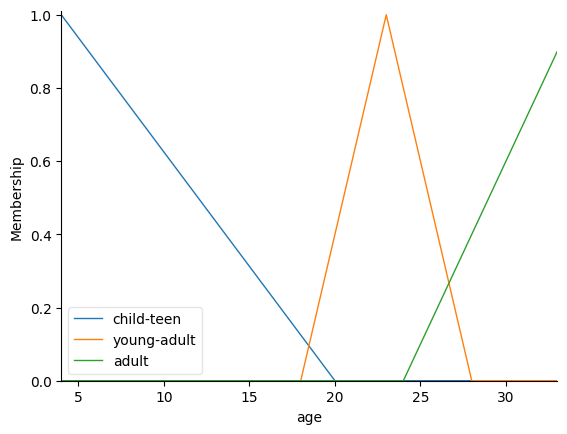

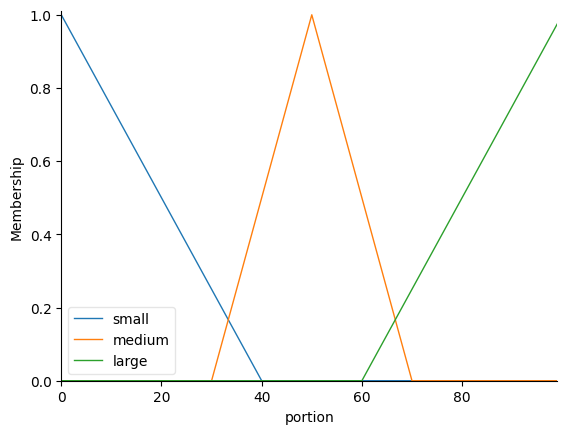

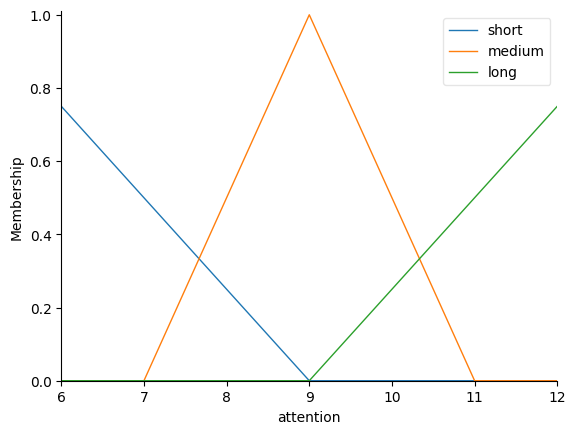

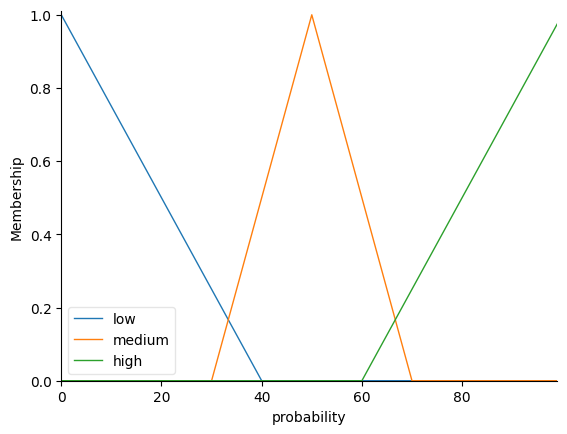

In [34]:
age.view()
portion.view()
attention.view()
probability.view()